/home/matteogu/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552411/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


pygame 2.1.2 (SDL 2.0.16, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
Obs:  array([201.0868, 196.7666, 201.0868, 196.7666,   1.9701])
Obs:        [agent_x,  agent_y,  block_x,  block_y,    block_angle]
Action:  array([223.4343, 254.787 ,   1.9701], dtype=float32)
Action:   [target_agent_x, target_agent_y]


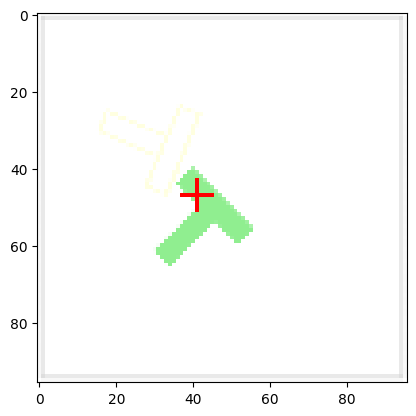

In [1]:
from imports import *
from draw import DrawOptions
# from PushTEnv import PushTEnv
import MoveTEnv
from MoveTEnv import PushTEnv
from PushTDataset import *
from Components import *

#@markdown ### **Env Demo**
#@markdown Standard Gym Env (0.21.0 API)

# 0. create env object
env = PushTEnv()

# 1. seed env for initial state. 
# Seed 0-200 are used for the demonstration dataset.
env.seed(1000)

# 2. must reset before use
obs = env.reset()

# 3. 2D positional action space [0,512]
action = env.action_space.sample()

# 4. Standard gym step method
obs, reward, done, info = env.step(action)

# prints and explains each dimension of the observation and action vectors
with np.printoptions(precision=4, suppress=True, threshold=5):
    print("Obs: ", repr(obs))
    print("Obs:        [agent_x,  agent_y,  block_x,  block_y,    block_angle]")
    print("Action: ", repr(action))
    print("Action:   [target_agent_x, target_agent_y]")

plt.imshow(env.render(mode = 'rgb_array'))

[246.90962822 309.89532172 146.90962822] reward: -7.44
[246.90962822 309.89532172 146.68273542] reward: -33.69
[246.90962822 309.89532172 146.45584262] reward: -75.23
[246.90962822 309.89532172 146.22894981] reward: -84.40
[246.90962822 309.89532172 146.00205701] reward: -83.14
[246.90962822 309.89532172 145.77516421] reward: -79.21
[246.90962822 309.89532172 145.5482714 ] reward: -74.65
[246.90962822 309.89532172 145.3213786 ] reward: -70.11

Obs:  array([373.04  , 401.9997, 373.04  , 401.9997,   0.0002])
Obs:        [agent_x,  agent_y,  block_x,  block_y,    block_angle]
Action:  array([246.9096, 309.8953, 145.0945])
Action:   [target_agent_x, target_agent_y]


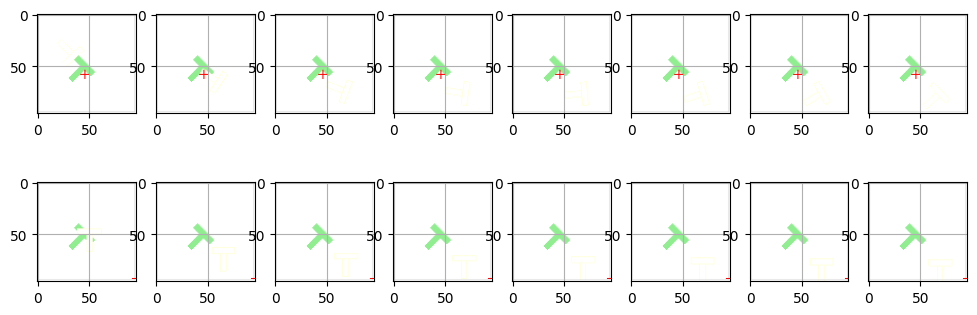

In [23]:
reload(MoveTEnv)
from MoveTEnv import PushTEnv


CONST = 0
fig, (axs1, axs2) = plt.subplots(2,8, figsize=(12,4))

env = PushTEnv()
env2 = PushTEnv()
env2.seed(1000)
env.seed(1000)
obs2 = env2.reset()
obs = env.reset()
# obs[0]-=40
obs[0:2] +=100
action = env.action_space.sample()

action = obs[0:3] + CONST
# action[2] = np.pi/180*10
# action[2] = np.pi/180*10

for ax1, ax2, i in zip(axs1, axs2, range(8)):
    print(action, end = ' ')
    obs, reward, done, info = env.step(action)
    print(f'reward: {reward:.2f}' )
    imgs = env.render('rgb_array')
    ax1.imshow(imgs)
    ax1.grid()
    action[0:2] += CONST
    action[2] -= np.pi/180*13

    action2, _ = model.predict(obs2, deterministic=True)
    obs, reward, done, info = env.step(action2)

    ax2.imshow(env.render('rgb_array'))
    ax2.grid()

print('')
# 4. Standard gym step method
# obs, reward, done, info = env.step(action)
# imgs = env.render(mode='rgb_array')
# ax2.imshow(imgs)
# ax2.grid()
# prints and explains each dimension of the observation and action vectors
with np.printoptions(precision=4, suppress=True, threshold=5):
    print("Obs: ", repr(obs))
    print("Obs:        [agent_x,  agent_y,  block_x,  block_y,    block_angle]")
    print("Action: ", repr(action))
    print("Action:   [target_agent_x, target_agent_y]")


In [17]:
reload(MoveTEnv)
from MoveTEnv import PushTEnv
env = PushTEnv()
env.seed(1000)

# import gymnasium as gym
import numpy as np
from stable_baselines3 import SAC, PPO, A2C, DDPG
from stable_baselines3.common.logger import configure
from datetime import datetime

now = datetime.now() # current date and time
date_time = now.strftime("%m_%d_%Y_%H_%M_%S")

model = DDPG("MlpPolicy", env, verbose=1)

# set up logger
tmp_path = f'./logs/{str(model).split(".")[1]}{date_time}' #"./logs"
os.mkdir(tmp_path)
new_logger = configure(tmp_path, ["stdout", "csv", "tensorboard"])

model.set_logger(new_logger)
model.learn(total_timesteps=2500000)


#
# model = SAC("MlpPolicy", env, verbose=2)
# model.learn(total_timesteps=100000, log_interval=4)
# model.save("sac_pendulum")
#
# del model # remove to demonstrate saving and loading
#
# model = SAC.load("sac_pendulum")
#
# obs = env.reset()
# while True:
#     action, _states = model.predict(obs, deterministic=True)
#     obs, reward, done, info = env.step(action)
#     env.render()
#     if done:
#       obs = env.reset()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ddpg04_18_2023_12_26_43
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 82        |
|    ep_rew_mean     | -1.01e+04 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 277       |
|    time_elapsed    | 1         |
|    total_timesteps | 328       |
| train/             |           |
|    actor_loss      | 48        |
|    critic_loss     | 9.27e+03  |
|    learning_rate   | 0.001     |
|    n_updates       | 164       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 82        |
|    ep_rew_mean     | -1.54e+04 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 183       |
|    time_elapsed    | 3         |
|    total_timesteps | 656       |
| train/             |  

KeyboardInterrupt: 

[512.          0.          6.2831855]
reward: -2.91
[5.1200000e+02 1.5258789e-05 6.2831855e+00]
reward: -0.15
[5.1200000e+02 5.7983398e-04 6.2831855e+00]
reward: -0.01
[5.1200000e+02 1.4190674e-03 6.2831855e+00]
reward: -0.00
[5.1200000e+02 1.8157959e-03 6.2831855e+00]
reward: -0.00
[5.1200000e+02 1.7852783e-03 6.2831855e+00]
reward: -0.00
[5.1200000e+02 1.6174316e-03 6.2831855e+00]
reward: -0.00
[5.1200000e+02 1.5258789e-03 6.2831855e+00]
reward: -0.00


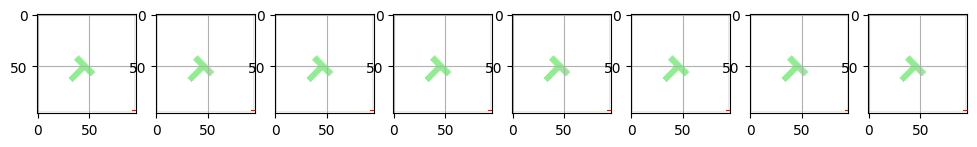

In [38]:
env2 = PushTEnv()
env2.seed(2000)
obs2 = env2.reset()

fig, axs = plt.subplots(1,8, figsize=(12,4))
for ax, i in zip(axs, range(8)):
    ax.imshow(env.render('rgb_array'))
    for _ in range(1):
        action2, _ = model.predict(obs2) #  deterministic=True
        print(action2)
        obs2, reward, done, info = env2.step(action2)
    print(f'reward: {reward:.2f}' )

    ax.grid()

In [39]:
#@markdown ### **Dataset Demo**

# download demonstration data from Google Drive
dataset_path = "pusht_cchi_v7_replay.zarr.zip"
if not os.path.isfile(dataset_path):
    id = "1KY1InLurpMvJDRb14L9NlXT_fEsCvVUq&confirm=t"
    gdown.download(id=id, output=dataset_path, quiet=False)

# parameters
pred_horizon = 16
obs_horizon = 2
action_horizon = 8
#|o|o|                             observations: 2
#| |a|a|a|a|a|a|a|a|               actions executed: 8
#|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p| actions predicted: 16

# create dataset from file
dataset = PushTStateDataset(
    dataset_path=dataset_path,
    pred_horizon=pred_horizon,
    obs_horizon=obs_horizon,
    action_horizon=action_horizon
)
# save training data statistics (min, max) for each dim
stats = dataset.stats

# create dataloader
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=256,
    num_workers=1,
    shuffle=True,
    # accelerate cpu-gpu transfer
    pin_memory=True,
    # don't kill worker process afte each epoch
    persistent_workers=True
)

# visualize data in batch
batch = next(iter(dataloader))
print("batch['obs'].shape:", batch['obs'].shape)
print("batch['action'].shape", batch['action'].shape)
print(len(dataset))
# batch.keys(), batch['obs'][0,0,:]

s = 0
for i in range(100):
    s += sum(dataset[i]['obs'][1] - dataset[i+1]['obs'][0])
    s += dataset[i]['action'][2] - dataset[i+1]['action'][1]

if -1e-6 < sum(s) < 1e-6:
    print('Dataset was generated slicing rollouts')


batch['obs'].shape: torch.Size([256, 2, 5])
batch['action'].shape torch.Size([256, 16, 2])
24208
Dataset was generated slicing rollouts


In [66]:

# print()
# env.goal_pose[2] ,- env.agent.angle

env.agent.angle

146.90962822116452

In [18]:
print('miao')

miao


In [22]:
model.save("ddpg_planning_")


In [20]:
model2 = DDPG.load("ddpg_planning")

print("date and time:",date_time)

date and time: 04_18_2023_12_26_43


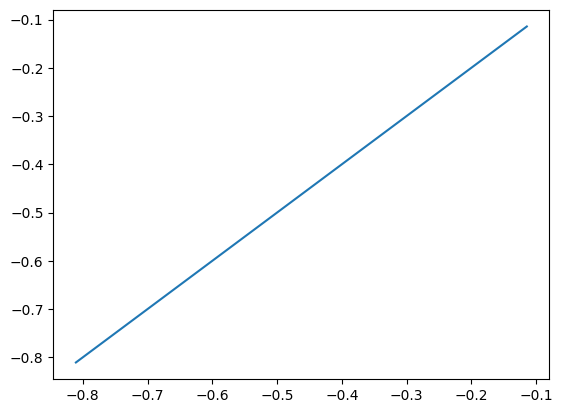

In [23]:
plt.plot(dataset[0]['action'][0], dataset[0]['action'][1])
# plt.plot(dataset[0]['obs'][0][2], dataset[0]['obs'][0][3], 'o')

In [12]:
env.observation_space

Box([0. 0. 0. 0. 0.], [512.        512.        512.        512.          6.2831855], (5,), float32)

In [ ]:
model.

[0.        0.        0.3619868] reward: 0.00
[0.95802015 0.         0.17453292] reward: 0.00
[1.267751   1.0529658  0.17453292] reward: 0.00
[0.8209504  1.0832969  0.17453292] reward: 0.00
[0.         0.5285661  0.25147745] reward: 0.00
[0.         1.2030778  0.17453292] reward: 0.00
[0.         0.180534   0.17453292] reward: 0.00
[1.1097653 0.        1.1426668] reward: 0.00
[0.34761295 0.07027595 0.17453292] reward: 0.00
[0.         0.         0.74821544] reward: 0.00


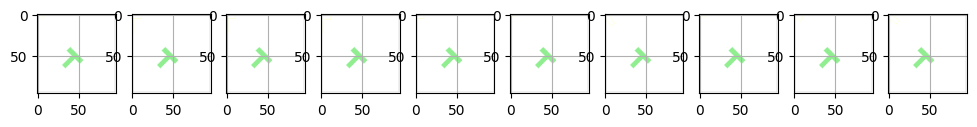

In [34]:
obs = env.reset()
# action, _states = model.predict(obs, deterministic=True)
# obs, reward, done, info = env.step(action)
# plt.imshow(env.render('rgb_array'))

fig, axs = plt.subplots(1,10, figsize=(12,4))

skip = 100
for ax, i in zip(axs, range(10)):
    print(action, end = ' ')
    rw = 0
    for _ in range(skip):
        action, _states = model.predict(obs, deterministic=False)
        obs, reward, done, info = env.step(action)
        rw+=reward
    print(f'reward: {rw:.2f}' )
    # action, _states = model.predict(obs, deterministic=True)
    # obs, reward, done, info = env.step(action)
    # print(f'{reward:.2f}')


    imgs = env.render('rgb_array')
    ax.imshow(imgs)
    ax.grid()
    action[0:2] += CONST
    action[2] += np.pi/180*10


In [15]:
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render('rgb_array')
    if done:
      obs = env.reset()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/matteogu/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_693566/2340270197.py", line 5, in <module>
    env.render('rgb_array')
  File "/home/matteogu/Desktop/cs282/MoveTEnv.py", line 138, in render
    return self._render_frame(mode)
  File "/home/matteogu/Desktop/cs282/MoveTEnv.py", line 214, in _render_frame
    np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/matteogu/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/matteogu/miniconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.str

In [13]:
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print
#
# from gymnasium.wrappers import EnvCompatibility
#
# algo = (
#     PPOConfig()
#     .rollouts(num_rollout_workers=1)
#     .resources(num_gpus=0)
#     .environment(env=PushTEnv)
#     .framework('torch')
#     .build()
# )
# for i in range(10):
#     result = algo.train()
#     print(pretty_print(result))
#
#     if i % 5 == 0:
#         checkpoint_dir = algo.save()
#         print(f"Checkpoint saved in directory {checkpoint_dir}")


In [12]:
env.reset()

array([146.90962822, 209.89532172,   2.91955884])

In [ ]:
#@markdown ### **Network Demo**

# observation and action dimensions corrsponding to
# the output of PushTEnv
obs_dim = 5
action_dim = 2

# create network object
noise_pred_net = ConditionalUnet1D(
    input_dim=action_dim,
    global_cond_dim=obs_dim*obs_horizon
)

# example inputs
noised_action = torch.randn((1, pred_horizon, action_dim))
obs = torch.zeros((1, obs_horizon, obs_dim))
diffusion_iter = torch.zeros((1,))

# the noise prediction network
# takes noisy action, diffusion iteration and observation as input
# predicts the noise added to action
noise = noise_pred_net(
    sample=noised_action, 
    timestep=diffusion_iter,
    global_cond=obs.flatten(start_dim=1))

# illustration of removing noise 
# the actual noise removal is performed by NoiseScheduler 
# and is dependent on the diffusion noise schedule
denoised_action = noised_action - noise

# for this demo, we use DDPMScheduler with 100 diffusion iterations
num_diffusion_iters = 100
noise_scheduler = DDPMScheduler(
    num_train_timesteps=num_diffusion_iters,
    # the choise of beta schedule has big impact on performance
    # we found squared cosine works the best
    beta_schedule='squaredcos_cap_v2',
    # clip output to [-1,1] to improve stability
    clip_sample=True,
    # our network predicts noise (instead of denoised action)
    prediction_type='epsilon'
)

# device transfer
device = torch.device('cuda')
_ = noise_pred_net.to(device)

number of parameters: 6.535322e+07


In [ ]:
#@markdown ### **Training**
#@markdown
#@markdown Takes about an hour. If you don't want to wait, skip to the next cell
#@markdown to load pre-trained weights

num_epochs = 100

# Exponential Moving Average
# accelerates training and improves stability
# holds a copy of the model weights
ema = EMAModel(
    model=noise_pred_net,
    power=0.75)

# Standard ADAM optimizer
# Note that EMA parametesr are not optimized
optimizer = torch.optim.AdamW(
    params=noise_pred_net.parameters(), 
    lr=1e-4, weight_decay=1e-6)

# Cosine LR schedule with linear warmup
lr_scheduler = get_scheduler(
    name='cosine',
    optimizer=optimizer,
    num_warmup_steps=500,
    num_training_steps=len(dataloader) * num_epochs
)

with tqdm(range(num_epochs), desc='Epoch') as tglobal:
    # epoch loop
    for epoch_idx in tglobal:
        epoch_loss = list()
        # batch loop
        with tqdm(dataloader, desc='Batch', leave=False) as tepoch:
            for nbatch in tepoch:
                # data normalized in dataset
                # device transfer
                nobs = nbatch['obs'].to(device)
                naction = nbatch['action'].to(device)
                B = nobs.shape[0]

                # observation as FiLM conditioning
                # (B, obs_horizon, obs_dim)
                obs_cond = nobs[:,:obs_horizon,:]
                # (B, obs_horizon * obs_dim)
                obs_cond = obs_cond.flatten(start_dim=1)

                # sample noise to add to actions
                noise = torch.randn(naction.shape, device=device)

                # sample a diffusion iteration for each data point
                timesteps = torch.randint(
                    0, noise_scheduler.config.num_train_timesteps, 
                    (B,), device=device
                ).long()

                # add noise to the clean images according to the noise magnitude at each diffusion iteration
                # (this is the forward diffusion process)
                noisy_actions = noise_scheduler.add_noise(
                    naction, noise, timesteps)
                
                # predict the noise residual
                noise_pred = noise_pred_net(
                    noisy_actions, timesteps, global_cond=obs_cond)
                
                # L2 loss
                loss = nn.functional.mse_loss(noise_pred, noise)

                # optimize
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                # step lr scheduler every batch
                # this is different from standard pytorch behavior
                lr_scheduler.step()

                # update Exponential Moving Average of the model weights
                ema.step(noise_pred_net)

                # logging
                loss_cpu = loss.item()
                epoch_loss.append(loss_cpu)
                tepoch.set_postfix(loss=loss_cpu)
        tglobal.set_postfix(loss=np.mean(epoch_loss))

# Weights of the EMA model
# is used for inference
ema_noise_pred_net = ema.averaged_model

In [ ]:
#@markdown ### **Loading Pretrained Checkpoint**
#@markdown Set `load_pretrained = True` to load pretrained weights.

load_pretrained = True
if load_pretrained:
  ckpt_path = "pusht_state_100ep.ckpt"
  if not os.path.isfile(ckpt_path):
      id = "1mHDr_DEZSdiGo9yecL50BBQYzR8Fjhl_&confirm=t"
      gdown.download(id=id, output=ckpt_path, quiet=False)

  state_dict = torch.load(ckpt_path, map_location='cuda')
  ema_noise_pred_net = noise_pred_net
  ema_noise_pred_net.load_state_dict(state_dict)
  print('Pretrained weights loaded.')
else:
  print("Skipped pretrained weight loading.")

Downloading...
From: https://drive.google.com/uc?id=1mHDr_DEZSdiGo9yecL50BBQYzR8Fjhl_&confirm=t
To: /content/pusht_state_100ep.ckpt
100%|██████████| 261M/261M [00:05<00:00, 45.8MB/s]


Pretrained weights loaded.


In [ ]:
#@markdown ### **Inference**

# limit enviornment interaction to 200 steps before termination
max_steps = 200
env = PushTEnv()
# use a seed >200 to avoid initial states seen in the training dataset
env.seed(100000)

# get first observation
obs = env.reset()

# keep a queue of last 2 steps of observations
obs_deque = collections.deque(
    [obs] * obs_horizon, maxlen=obs_horizon)
# save visualization and rewards
imgs = [env.render(mode='rgb_array')]
rewards = list()
done = False
step_idx = 0

with tqdm(total=max_steps, desc="Eval PushTStateEnv") as pbar:
    while not done:
        B = 1
        # stack the last obs_horizon (2) number of observations
        obs_seq = np.stack(obs_deque)
        # normalize observation
        nobs = normalize_data(obs_seq, stats=stats['obs'])
        # device transfer
        nobs = torch.from_numpy(nobs).to(device, dtype=torch.float32)

        # infer action
        with torch.no_grad():
            # reshape observation to (B,obs_horizon*obs_dim)
            obs_cond = nobs.unsqueeze(0).flatten(start_dim=1)

            # initialize action from Guassian noise
            noisy_action = torch.randn(
                (B, pred_horizon, action_dim), device=device)
            naction = noisy_action
            
            # init scheduler
            noise_scheduler.set_timesteps(num_diffusion_iters)

            for k in noise_scheduler.timesteps:
                # predict noise
                noise_pred = ema_noise_pred_net(
                    sample=naction, 
                    timestep=k,
                    global_cond=obs_cond
                )

                # inverse diffusion step (remove noise)
                naction = noise_scheduler.step(
                    model_output=noise_pred,
                    timestep=k,
                    sample=naction
                ).prev_sample

        # unnormalize action
        naction = naction.detach().to('cpu').numpy()
        # (B, pred_horizon, action_dim)
        naction = naction[0]
        action_pred = unnormalize_data(naction, stats=stats['action'])

        # only take action_horizon number of actions
        start = obs_horizon - 1
        end = start + action_horizon
        action = action_pred[start:end,:]
        # (action_horizon, action_dim)

        # execute action_horizon number of steps
        # without replanning
        for i in range(len(action)):
            # stepping env
            obs, reward, done, info = env.step(action[i])
            # save observations
            obs_deque.append(obs)
            # and reward/vis
            rewards.append(reward)
            imgs.append(env.render(mode='rgb_array'))

            # update progress bar
            step_idx += 1
            pbar.update(1)
            pbar.set_postfix(reward=reward)
            if step_idx > max_steps:
                done = True
            if done:
                break

# print out the maximum target coverage
print('Score: ', max(rewards))

# visualize
from IPython.display import Video
vwrite('vis.mp4', imgs)
Video('vis.mp4', embed=True, width=256, height=256)

Eval PushTStateEnv:   0%|          | 0/200 [00:00<?, ?it/s]

Score:  1.0
